# Score Metrics

## Fetch all repositories

In [2]:
from edfi_tech_metrics.ossf_score import fetch_repositories
from edfi_tech_metrics.disable_tls import no_tls_verification

# Fetch repositories for Ed-Fi-Alliance-OSS and Ed-Fi-Exchange-OSS
with no_tls_verification():
    ed_fi_alliance_repos = fetch_repositories('Ed-Fi-Alliance-OSS')
    ed_fi_exchange_repos = fetch_repositories('Ed-Fi-Exchange-OSS')

# Combine the repositories
repositories = ed_fi_alliance_repos + ed_fi_exchange_repos

# Display the repositories
# repositories

### Retrieve OSSF Scores

In [3]:
import math
import pandas as pd

from edfi_tech_metrics.ossf_score import report_ossf_scores

# Get and print the OSSF scores
with no_tls_verification():
    ossf_scores = report_ossf_scores(repositories)
    
ossf_scores_df = pd.DataFrame(list(ossf_scores.items()), columns=['Repository', 'Score'])

# Filter out the repositories where math.isnan is false
valid_ossf_scores_df = ossf_scores_df[ossf_scores_df['Score'].apply(lambda x: not math.isnan(x))]

# Filter out the repositories where math.isnan is true
invalid_ossf_scores_df = ossf_scores_df[ossf_scores_df['Score'].apply(lambda x: math.isnan(x))]


### Saving OSSF Scores to a .csv file

In [4]:
from datetime import datetime

# Save the scores to a CSV file
now = datetime.strftime(datetime.now(), "%Y-%m-%d")
output_file = f"./data/ossf-scores/{now}.csv"
ossf_scores_df.to_csv(output_file, index=False)

print(f"OSSF scores saved to {output_file}")

OSSF scores saved to ./data/ossf-scores/2024-08-15.csv


### OSSF Score Histogram

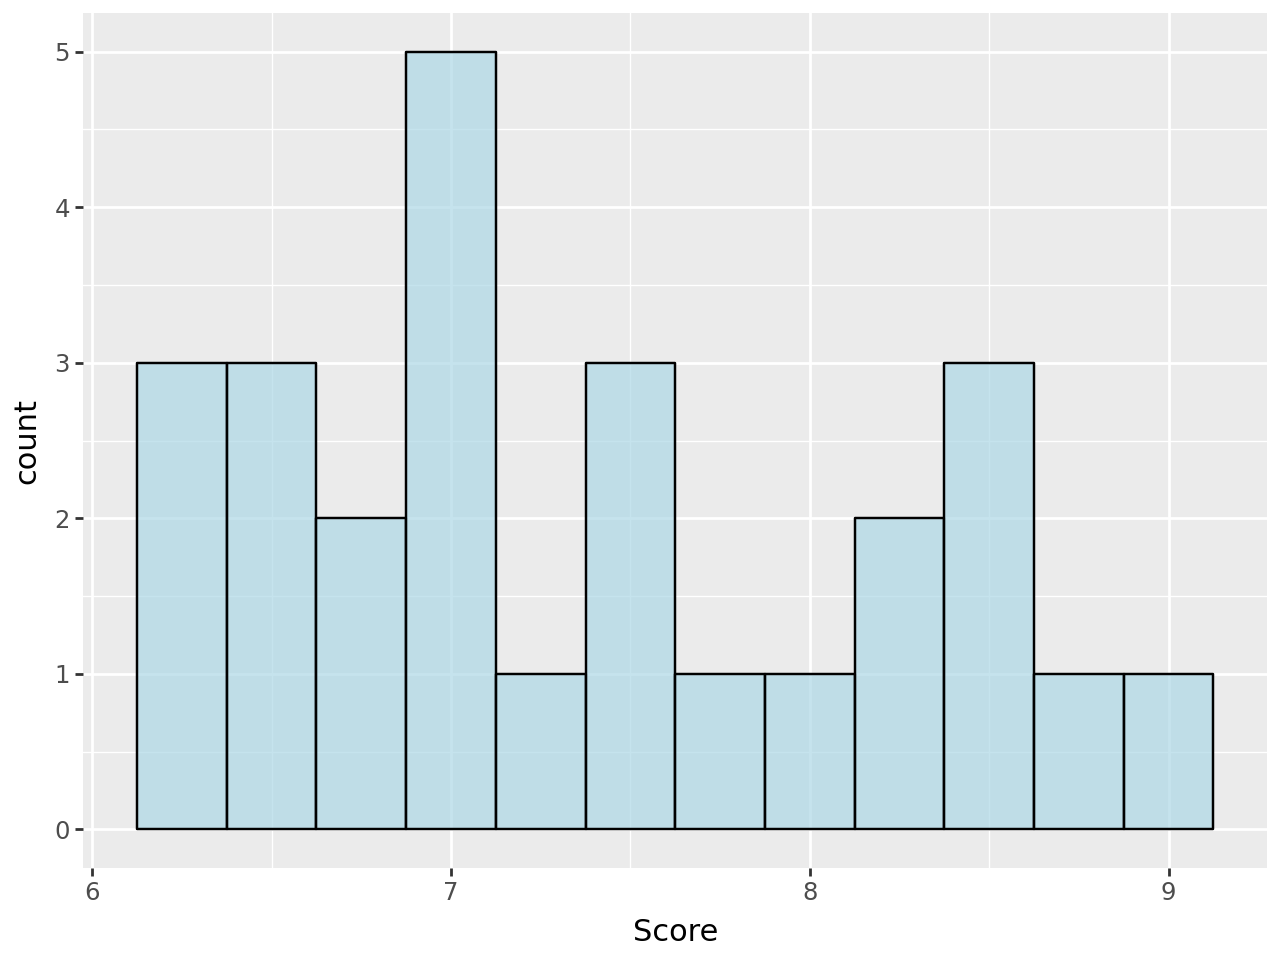

In [5]:
from plotnine import ggplot, aes, geom_histogram

# Plot the OSSF scores
plot = ggplot(valid_ossf_scores_df, aes(x='Score')) + geom_histogram(bins=10,binwidth=0.25, fill='lightblue', color='black', alpha=0.7)

plot

### OSSF Scores

In [6]:
display(valid_ossf_scores_df.sort_values(by='Score', ascending=False).reset_index(drop=True))

valid_ossf_scores_df.describe()

,Repository,Score
0,Ed-Fi-Alliance-OSS/Data-Management-Service,9.0
1,Ed-Fi-Alliance-OSS/AdminAPI-1.x,8.7
2,Ed-Fi-Alliance-OSS/Ed-Fi-DataImport,8.6
3,Ed-Fi-Alliance-OSS/Ed-Fi-ODS-AdminApp,8.6
4,Ed-Fi-Alliance-OSS/AdminAPI-2.x,8.5
5,Ed-Fi-Alliance-OSS/Ed-Fi-API-Publisher,8.5
6,Ed-Fi-Exchange-OSS/Meadowlark,8.1
7,Ed-Fi-Alliance-OSS/Ed-Fi-ODS-Implementation,8.1
8,Ed-Fi-Alliance-OSS/Ed-Fi-Databases,7.9
9,Ed-Fi-Alliance-OSS/Ed-Fi-Compatibility-Libraries,7.7


,Score
count,25.000000
mean,7.388000
std,0.961908
min,5.300000
25%,6.700000
50%,7.300000
75%,8.100000
max,9.000000


### Repositories without an OSSF Scorecard

In [7]:
display(invalid_ossf_scores_df.reset_index(drop=True))

,Repository,Score
0,Ed-Fi-Alliance-OSS/EdFi.Installer.AppCommon,NaN
1,Ed-Fi-Alliance-OSS/Starter-Kit-SEA-Modernization,NaN
2,Ed-Fi-Alliance-OSS/Roster-Starter-Kit-for-Vendors,NaN
3,Ed-Fi-Alliance-OSS/Ed-Fi-Starter-Kit-Equity,NaN
4,Ed-Fi-Alliance-OSS/Ed-Fi-Starter-Kit-Assessments,NaN
...,...,...
87,Ed-Fi-Exchange-OSS/YesPrep-FamilyEngagementPor...,NaN
88,Ed-Fi-Exchange-OSS/ParallelAPIConsumption,NaN
89,Ed-Fi-Exchange-OSS/Student-Engagement-Management,NaN
90,Ed-Fi-Exchange-OSS/n8n-demo-file-to-API,NaN


### Compare current scores to previous scores

In [7]:
from edfi_tech_metrics.ossf_score import compare_with_previous_scores
from IPython.display import display, Markdown

comparison_df, improved_repos, worsened_repos = compare_with_previous_scores(ossf_scores)

# Display improved and worsened repositories
if improved_repos:
    improved_df = comparison_df[comparison_df['Repository'].isin(improved_repos)][['Repository', 'Previous Score', 'Current Score', 'Percentage Change']]
    improved_df = improved_df.sort_values('Percentage Change', ascending=False).reset_index(drop=True)
    display(Markdown("#### Repositories improved by 10% or more:"))
    display(improved_df)
else:
    display(Markdown("#### No repositories improved by 10% or more."))

if worsened_repos:
    worsened_df = comparison_df[comparison_df['Repository'].isin(worsened_repos)][['Repository', 'Previous Score', 'Current Score', 'Percentage Change']]
    worsened_df = worsened_df.sort_values('Percentage Change', ascending=True).reset_index(drop=True)
    display(Markdown("#### Repositories worsened by 10% or more:"))
    display(worsened_df)
else:
    display(Markdown("#### No repositories worsened by 10% or more."))

#### Repositories improved by 10% or more:

,Repository,Previous Score,Current Score,Percentage Change
0,Ed-Fi-Exchange-OSS/LMS-Toolkit,5.3,6.2,16.981132


#### No repositories worsened by 10% or more.